

<br><h1>Classification Model Development</h1>
<h4>DAT-5303 | Machine Learning</h4>
Ulf Kavlie<br>
Hult International Business School<br><br><br>



In [1]:
# importing necessary packages
import random as rand                     
import pandas as pd                      
import matplotlib.pyplot as plt                    
import seaborn as sns 
import numpy as np

from sklearn.ensemble import RandomForestClassifier    
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.metrics import make_scorer               
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import confusion_matrix         
from sklearn.metrics import roc_auc_score           
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier    
from sklearn.tree import export_graphviz  


from six import StringIO          
from IPython.display import Image                 
import pydotplus   
  

In [2]:
file = "./Apprentice_Chef_Dataset.xlsx"
data_types = {"AVG_CLICKS_PER_VISIT":float} # change type of AVG_CLICKS_PER_VISIT according to data dictionary
df = pd.read_excel(io = file,
                   dtype = data_types
                  )
df = df.rename(columns = {"LARGEST_ORDER_SIZE" : "AVG_ORDER_SIZE"}) # Renaming LARGEST_ORDER_SIZE to AVG_ORDER_SIZE
df.head()

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,AVG_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,...,0,2,0,0,33.4,1,0,1,17.0,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,...,0,2,0,0,84.8,1,0,3,13.0,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,...,0,1,0,0,63.0,1,0,2,16.0,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,...,0,3,0,0,43.8,1,0,2,14.0,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,...,0,8,0,0,84.8,1,1,3,12.0,205


# FEATURE ENGINEERING

## CONTINUOUS VARIABLES

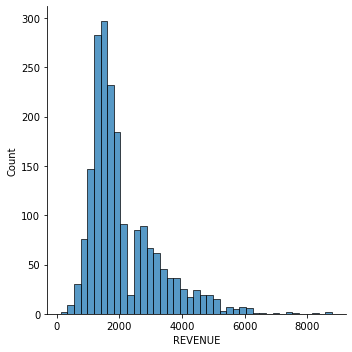

In [3]:
# Looking at the distribution of "REVENUE"

sns.displot(x = "REVENUE",
           data = df)

plt.tight_layout()
plt.show()

In [4]:
# log-transforming "REVENUE"

df["log_REVENUE"] = np.log10(df["REVENUE"])

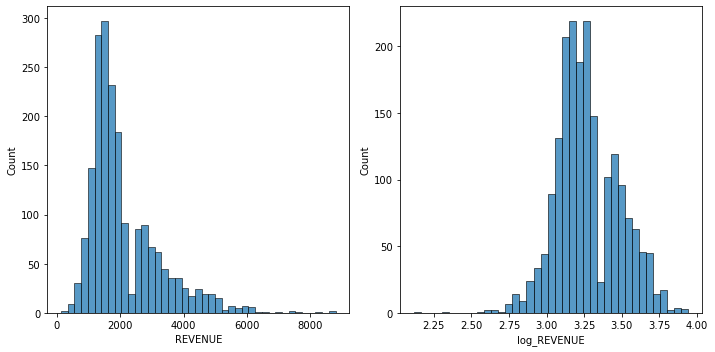

In [5]:
fig, ax = plt.subplots(figsize = (10,5))

plt.subplot(1,2,1)
sns.histplot(x = "REVENUE",
             data = df
            )
plt.subplot(1,2,2)
sns.histplot(x = "log_REVENUE",
             data = df
            )

plt.tight_layout()
plt.show()

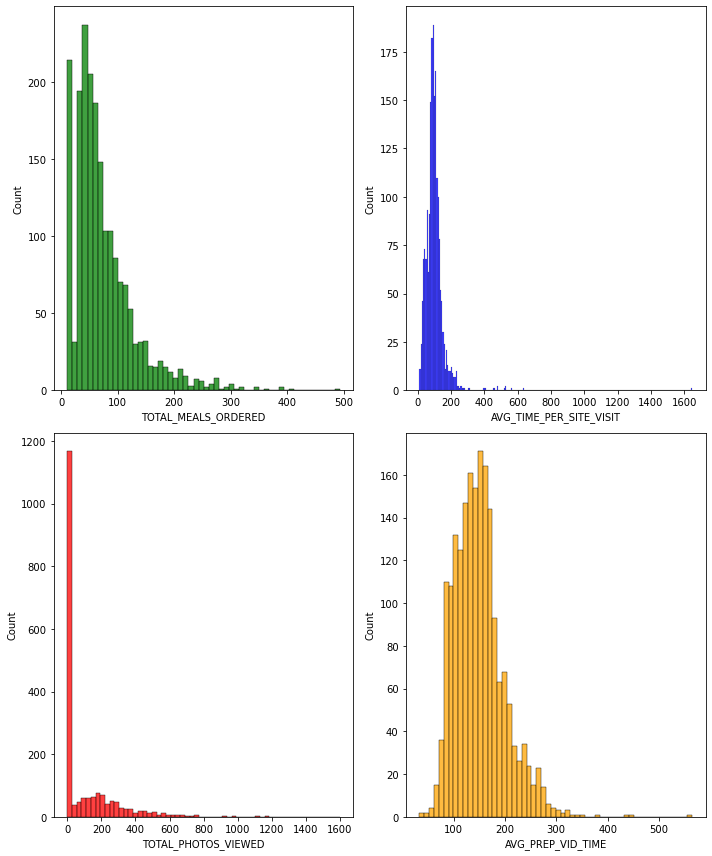

In [6]:
# Showing histogram for variables

fig, ax = plt.subplots(figsize = (10,12))

plt.subplot(2,2,1)
sns.histplot(x = df["TOTAL_MEALS_ORDERED"],
            color = "green")

plt.subplot(2,2,2)
sns.histplot(x = df["AVG_TIME_PER_SITE_VISIT"],
            color = "blue")

plt.subplot(2,2,3)
sns.histplot(x = df["TOTAL_PHOTOS_VIEWED"],
            color = "red")

plt.subplot(2,2,4)
sns.histplot(x = df["AVG_PREP_VID_TIME"],
            color = "orange")

plt.tight_layout()
plt.show()

In [7]:
# Checking the column TOTAL_PHOTOS_VIEWED for number of 0 vs non-0

photo_zeroes = sum(df["TOTAL_PHOTOS_VIEWED"]==0)


print(f"""
                 Zero\t\tOther Values
                -----------------------------
Photos         | {photo_zeroes}\t\t{len(df) - photo_zeroes}""")


                 Zero		Other Values
                -----------------------------
Photos         | 1140		806


In [8]:
# Creating a dummie variable for column "TOTAL_PHOTOS_VIEWED"

df["VIEWS_PHOTO"]=0
for index, value in df.iterrows():
    if df.loc[index,"TOTAL_PHOTOS_VIEWED"]>0:
        df.loc[index,"VIEWS_PHOTO"]=1

In [9]:
# log-transforming "TOTAL_MEALS_ORDERED", "AVG_PREP_VID_TIME" and "AVG_TIME_PER_SITE_VISIT"

df["log_TOTAL_MEALS_ORDERED"]= np.log10(df["TOTAL_MEALS_ORDERED"])
df["log_AVG_TIME_PER_SITE_VISIT"]= np.log10(df["AVG_TIME_PER_SITE_VISIT"])
df["log_AVG_PREP_VID_TIME"]=np.log(df["AVG_PREP_VID_TIME"])

# log-transforming "TOTAL_PHOTOS_VIEWED" which has 0
df["log_TOTAL_PHOTOS_VIEWED"]=0
for index, value in df.iterrows():
    if df.loc[index,"TOTAL_PHOTOS_VIEWED"]==0:
        df.loc[index,"log_TOTAL_PHOTOS_VIEWED"]=np.log10(0.01)
    else:
        df.loc[index,"log_TOTAL_PHOTOS_VIEWED"] = np.log10(df.loc[index, "TOTAL_PHOTOS_VIEWED"])

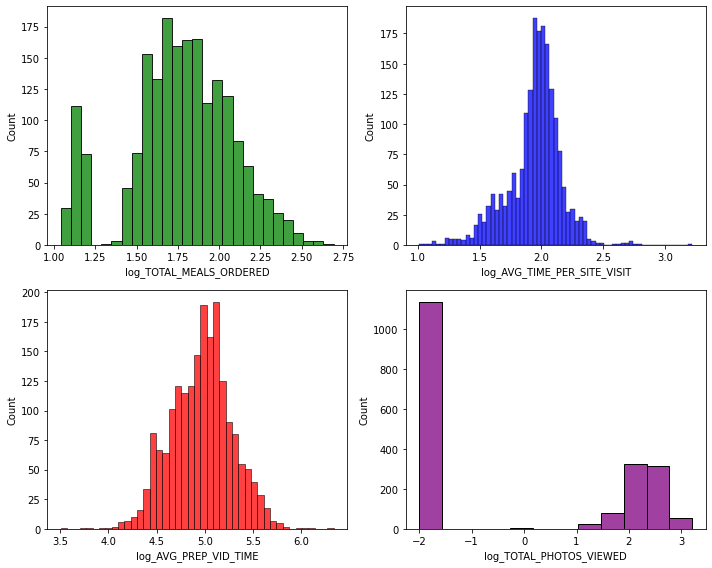

In [10]:
# Checking the new distributions

fig, ax = plt.subplots(figsize = (10,8))

plt.subplot(2,2,1)
sns.histplot(x = df["log_TOTAL_MEALS_ORDERED"],
            color = "green")

plt.subplot(2,2,2)
sns.histplot(x = df["log_AVG_TIME_PER_SITE_VISIT"],
            color = "blue")

plt.subplot(2,2,3)
sns.histplot(x = df["log_AVG_PREP_VID_TIME"],
            color = "red")

plt.subplot(2,2,4)
sns.histplot(x = df["log_TOTAL_PHOTOS_VIEWED"],
            color = "purple")

plt.tight_layout()
plt.show()

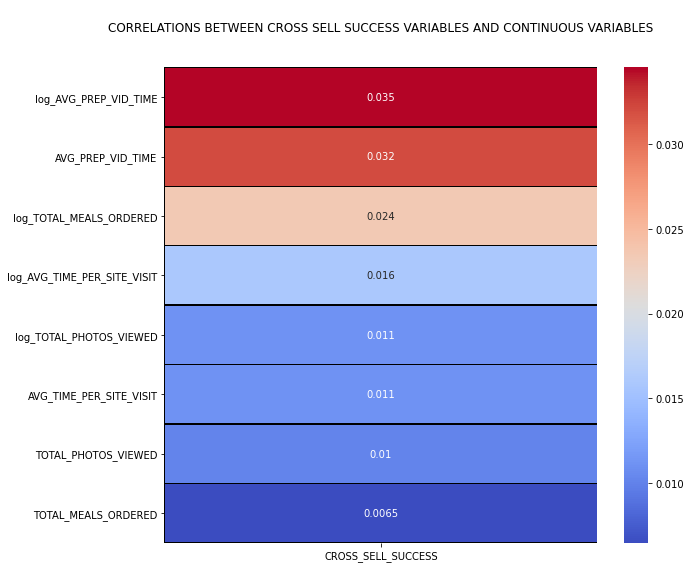

In [11]:
# CHECKING FOR CORRELATIONS 

fig, ax = plt.subplots(figsize=(10,8))

continuous = ["TOTAL_MEALS_ORDERED","AVG_TIME_PER_SITE_VISIT","TOTAL_PHOTOS_VIEWED",
              "AVG_PREP_VID_TIME","log_TOTAL_MEALS_ORDERED","log_AVG_TIME_PER_SITE_VISIT",
              "log_AVG_PREP_VID_TIME","log_REVENUE","CROSS_SELL_SUCCESS","log_TOTAL_PHOTOS_VIEWED"]

continuous_corr = df[continuous].corr(method = "pearson")


sns.heatmap(continuous_corr.loc[["TOTAL_MEALS_ORDERED","AVG_TIME_PER_SITE_VISIT",
                                 "TOTAL_PHOTOS_VIEWED","AVG_PREP_VID_TIME","log_TOTAL_MEALS_ORDERED",
                                 "log_AVG_TIME_PER_SITE_VISIT","log_AVG_PREP_VID_TIME","log_TOTAL_PHOTOS_VIEWED"],
                                ["CROSS_SELL_SUCCESS"]].sort_values(by = "CROSS_SELL_SUCCESS", ascending = False),
            annot = True,
            cmap = "coolwarm",
            linecolor = "black",
            linewidth = 0.5
           )

plt.title("""
CORRELATIONS BETWEEN CROSS SELL SUCCESS VARIABLES AND CONTINUOUS VARIABLES

""")
plt.tight_layout()
plt.show()

## INTERVAL VARIABLES

- MEDIAN_MEAL_RATING
- PRODUCT_CATEGORIES_VIEWED
- AVG_ORDER_SIZE 
- WEEKLY_PLAN
- EARLY_DELIVERIES
- LATE_DELIVERIES
- CANCELLATIONS_BEFORE_NOON
- CANCELLATIONS_AFTER_NOON
- MASTER_CLASSES_ATTENDED
- UNIQUE_MEALS_PURCH
- AVG_CLICKS_PER_VISIT
- CONTACTS_W_CUSTOMER_SERVICE
- PC_LOGINS
- MOBILE_LOGINS

In [12]:
int_var = ["MEDIAN_MEAL_RATING", "PRODUCT_CATEGORIES_VIEWED", "AVG_ORDER_SIZE" , "WEEKLY_PLAN", "EARLY_DELIVERIES",
"LATE_DELIVERIES", "CANCELLATIONS_BEFORE_NOON", "CANCELLATIONS_AFTER_NOON", "MASTER_CLASSES_ATTENDED",
"UNIQUE_MEALS_PURCH", "AVG_CLICKS_PER_VISIT", "CONTACTS_W_CUSTOMER_SERVICE", "PC_LOGINS", "MOBILE_LOGINS"]

In [13]:
#CHECKING COUNT MASTERCLASSES ATTENDED
attends_masterclass = sum(df["MASTER_CLASSES_ATTENDED"]>0)

#CHECKING COUNT OF CONTACTS WITH CUSTOMER SERVICE ABOVE 11
high_cs_contact = sum(df["CONTACTS_W_CUSTOMER_SERVICE"]>=11)

print(f"""
                  HIGH\t\tOTHER
                 ---------------------
Attends MC      | {attends_masterclass}\t\t{len(df) - attends_masterclass}
Contact w/CS    | {high_cs_contact}\t\t{len(df) - high_cs_contact}

""")


                  HIGH		OTHER
                 ---------------------
Attends MC      | 1014		932
Contact w/CS    | 216		1730




In [14]:
# Creating categorical variable from interval

df["HIGH_CONTACT_W_CUSTOMER_SUPPORT"]=0
for index, value in df.iterrows():
    if df.loc[index,"CONTACTS_W_CUSTOMER_SERVICE"]>=11:
        df.loc[index,"HIGH_CONTACT_W_CUSTOMER_SUPPORT"]=1
        
df["ATTENDS_MASTER_CLASS"]=0
for index, value in df.iterrows():
    if df.loc[index,"MASTER_CLASSES_ATTENDED"]>0:
        df.loc[index,"ATTENDS_MASTER_CLASS"]=1

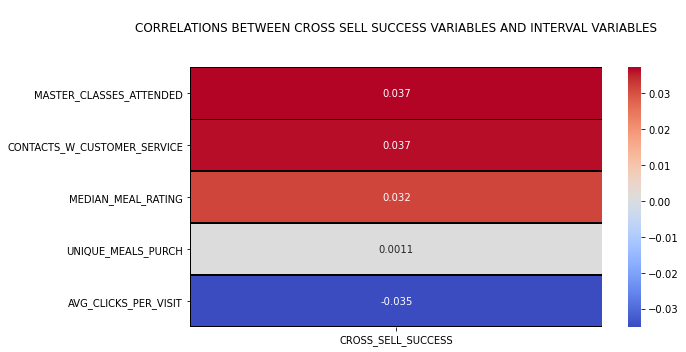

In [15]:
# Checking correlations for interval variables

fig, ax = plt.subplots(figsize = (10,5))

int_var = ["UNIQUE_MEALS_PURCH","MEDIAN_MEAL_RATING",
           "AVG_CLICKS_PER_VISIT","MASTER_CLASSES_ATTENDED",
           "CONTACTS_W_CUSTOMER_SERVICE","CROSS_SELL_SUCCESS"]

interval_corr = df[int_var].corr(method = "pearson")


sns.heatmap(interval_corr.loc[["UNIQUE_MEALS_PURCH","MEDIAN_MEAL_RATING",
                               "AVG_CLICKS_PER_VISIT","MASTER_CLASSES_ATTENDED",
                               "CONTACTS_W_CUSTOMER_SERVICE"],
                              ["CROSS_SELL_SUCCESS"]].sort_values(by = "CROSS_SELL_SUCCESS", ascending = False),
            annot = True,
            cmap = "coolwarm",
            linecolor = "black",
            linewidth = 0.5
           )
plt.title("""
CORRELATIONS BETWEEN CROSS SELL SUCCESS VARIABLES AND INTERVAL VARIABLES

""")
plt.tight_layout()
plt.show()

## CATEGORICAL VARIABLES

- TASTES_AND_PREFERENCES
- PACKAGE_LOCKER
- REFRIGERATED_LOCKER
- HIGH_CONTACT_W_CUSTOMER_SUPPORT
- VIEWS_PHOTO
- ATTENDS_MASTER_CLASS

In [16]:
# creating dummies on email

# empty list
placeholder_lst = []

# looping over each email address
for index, col in df.iterrows():
    
    # splitting email domain at '@'
    split_email = df.loc[index, 'EMAIL'].split(sep = "@")
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)



# renaming column to concatenate
email_df.columns = ["0" , "personal_email_domain"]


# concatenating personal_email_domain with main df
df = pd.concat([df, email_df["personal_email_domain"]],
                   axis = 1)


# list of professional email domains
prof_domain = ["mmm.com","amex.com","apple.com","boeing.com","caterpillar.com",
               "chevron.com","cisco.com","cocacola.com","disney.com","dupont.com",
               "exxon.com","ge.org","goldmansacs.com","homedepot.com","ibm.com",
               "intel.com","jnj.com","jpmorgan.com","mcdonalds.com","merck.com",
               "microsoft.com","nike.com","pfizer.com","pg.com","travelers.com",
               "unitedtech.com","unitedhealth.com","verizon.com","visa.com",
               "walmart.com"]

# lsit of personal email domains
personal_domain  = ["gmail.com","yahoo.com","protonmail.com"]

# list of junk domains
junk_domain     = ["me.com","aol.com","hotmail.com","live.com","msn.com","passport.com"]

# looping over every email and creating categorical lists
placeholder_lst = []
for domain in df['personal_email_domain']:
        if domain in personal_domain:
            placeholder_lst.append('DUMMIE_PERSONAL')
            
        elif domain in prof_domain:
            placeholder_lst.append('DUMMIE_PROFESSIONAL')
            
        elif domain in junk_domain:
            placeholder_lst.append('DUMMIE_JUNK')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
df['domain_group'] = pd.Series(placeholder_lst)


In [17]:
# transforming domains_dummie to actual dummies, dropping first
domains_dummie = pd.get_dummies(df["domain_group"], drop_first = True)

# joining with df
df = df.join(domains_dummie)

In [18]:
cat_var = ["CROSS_SELL_SUCCESS", "TASTES_AND_PREFERENCES", "PACKAGE_LOCKER",
           "REFRIGERATED_LOCKER","HIGH_CONTACT_W_CUSTOMER_SUPPORT",
           "VIEWS_PHOTO","DUMMIE_PERSONAL","DUMMIE_PROFESSIONAL","ATTENDS_MASTER_CLASS"]

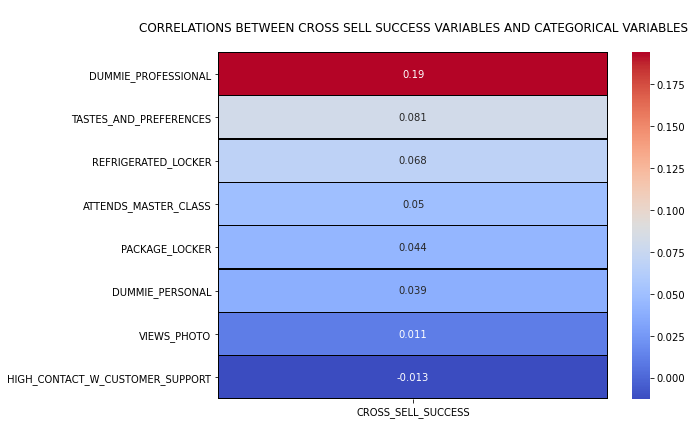

In [19]:
# Checking correlation for all categorical variables, including those created
fig, ax = plt.subplots(figsize = (10,6))

cat_corr = df[cat_var].corr()

sns.heatmap(cat_corr.loc[["TASTES_AND_PREFERENCES",
                          "PACKAGE_LOCKER","REFRIGERATED_LOCKER",
                          "HIGH_CONTACT_W_CUSTOMER_SUPPORT", "VIEWS_PHOTO",
                          "DUMMIE_PERSONAL","DUMMIE_PROFESSIONAL","ATTENDS_MASTER_CLASS"],
                         ["CROSS_SELL_SUCCESS"]].sort_values(by = "CROSS_SELL_SUCCESS", ascending = False),
            cmap = "coolwarm",
            annot = True,
            linecolor = "black",
            linewidth = 0.5)
plt.title("""
CORRELATIONS BETWEEN CROSS SELL SUCCESS VARIABLES AND CATEGORICAL VARIABLES
""")

plt.tight_layout()
plt.show()

# FURTHER FEATURE ENGINEERING

In [20]:
# Creating new variables

# Share of total meals ordered that are unique
df["SHARES_UNIQUE"]=df["UNIQUE_MEALS_PURCH"]/df["TOTAL_MEALS_ORDERED"]

# How much does a customer explore on their website/app
df["EXPLORATION"]=df["TOTAL_PHOTOS_VIEWED"]+df["PRODUCT_CATEGORIES_VIEWED"]

# How much does a customer explore on their website/app on average per visit
df["TOTAL_LOGIN"]=df["MOBILE_LOGINS"]+df["PC_LOGINS"] 
df["AVG_EXPLORATION"]=df["EXPLORATION"]/df["TOTAL_LOGIN"]

# Share of orders that are cancelled
df["TOTAL_CANCELLATION"] = df["CANCELLATIONS_AFTER_NOON"]+df["CANCELLATIONS_BEFORE_NOON"]
df["CANCELLATION_PERCENTAGE"] = df["TOTAL_CANCELLATION"]/df["TOTAL_MEALS_ORDERED"]

# How much time they spend in total 
df["AVG_SITE_TIME"]=(df["AVG_TIME_PER_SITE_VISIT"]+df["AVG_PREP_VID_TIME"])

# Complain as a percentage of meals ordered
df["COMPLAIN_RATIO"] = df["CONTACTS_W_CUSTOMER_SERVICE"]/df["TOTAL_MEALS_ORDERED"]

# Average spending
df["AVG_SPENDING"] = df["REVENUE"]/df["TOTAL_MEALS_ORDERED"]

# creating name lenght variable
df["NAME_LENGTH"]=0
for index, value in df.iterrows():
    df.loc[index,"NAME_LENGTH"]=len(df.loc[index,"NAME"].split())
    
# creating dummies for those who spend above and below upper/lower quantile
df["SMALL_SPENDER"] = 0
for index, value in df.iterrows():
    if df.loc[index,"REVENUE"]<df["REVENUE"].quantile(.25):
        df.loc[index,"SMALL_SPENDER"]=1
df["BIG_SPENDER"] = 0
for index, value in df.iterrows():
    if df.loc[index,"REVENUE"]>df["REVENUE"].quantile(.75):
        df.loc[index,"BIG_SPENDER"]=1

In [21]:
# Transforming necessary data to log

df["log_SHARES_UNIQUE"] = np.log10(df["SHARES_UNIQUE"])
df["log_AVG_SITE_TIME"] = np.log10(df["AVG_SITE_TIME"])
df["log_COMPLAIN_RATIO"]=np.log10(df["COMPLAIN_RATIO"])

# log-transformation of cancellation percentage, which contains 0
df["log_CANCELLATION_PERCENTAGE"]=0
# looping over every value
for index, value in df.iterrows():
    # checks for 0 values
    if df.loc[index,"CANCELLATION_PERCENTAGE"]==0:
        # takes log10 of 0.001
        df.loc[index,"log_CANCELLATION_PERCENTAGE"]=np.log10(0.001)
    else:
        df.loc[index,"log_CANCELLATION_PERCENTAGE"] = np.log10(df.loc[index, "CANCELLATION_PERCENTAGE"])

# Dummie variable of customers who cancels       
df["CANCELLING_CUSTOMER"]=0
for index, value in df.iterrows():
    if df.loc[index,"TOTAL_CANCELLATION"]>0:
        df.loc[index,"CANCELLING_CUSTOMER"]=1



In [22]:
# dummie of weekly plan by quarters

df['WEEKLY_PLAN_6months']   = 0
df['WEEKLY_PLAN_9months']   = 0
df['WEEKLY_PLAN_12months']   = 0

# Looping over weekly plan
for index, value in df.iterrows():       
    if df.loc[index, 'WEEKLY_PLAN'] <= 26 and df.loc[index, 'WEEKLY_PLAN'] > 13:
        df.loc[index, 'WEEKLY_PLAN_6months'] = 1
        
    elif df.loc[index, 'WEEKLY_PLAN'] <= 39 and df.loc[index, 'WEEKLY_PLAN'] > 26:
        df.loc[index, 'WEEKLY_PLAN_9months'] = 1
        
    elif df.loc[index, 'WEEKLY_PLAN'] <= 52 and df.loc[index, 'WEEKLY_PLAN'] > 39:
        df.loc[index, 'WEEKLY_PLAN_12months'] = 1


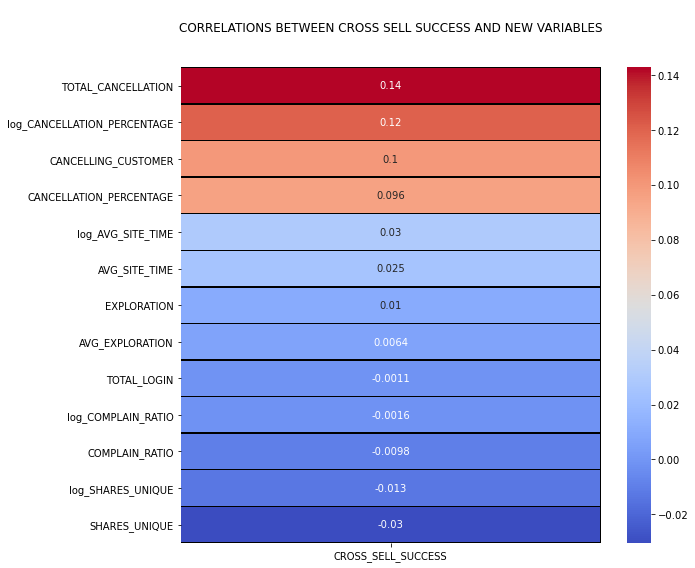

In [24]:
# Checking correlations for newly created variables
fig, ax = plt.subplots(figsize = (10,8))
# making list of relevant values
new_var = ["CROSS_SELL_SUCCESS","EXPLORATION","AVG_SITE_TIME",
           "log_AVG_SITE_TIME","CANCELLATION_PERCENTAGE","log_CANCELLATION_PERCENTAGE",
           "log_COMPLAIN_RATIO","TOTAL_CANCELLATION","SHARES_UNIQUE","log_SHARES_UNIQUE",
           "TOTAL_LOGIN","AVG_EXPLORATION","CANCELLING_CUSTOMER","COMPLAIN_RATIO"]
# inserting list into correlation matrix
new_var_corr = df[new_var].corr(method = "pearson")
# visualising with heatmap
sns.heatmap(new_var_corr.loc[["EXPLORATION","AVG_SITE_TIME",
                              "log_AVG_SITE_TIME","CANCELLATION_PERCENTAGE","log_COMPLAIN_RATIO",
                              "TOTAL_CANCELLATION","SHARES_UNIQUE","log_SHARES_UNIQUE","log_CANCELLATION_PERCENTAGE",
                              "TOTAL_LOGIN" ,"AVG_EXPLORATION","CANCELLING_CUSTOMER","COMPLAIN_RATIO"],
                             ["CROSS_SELL_SUCCESS"]].sort_values(by = "CROSS_SELL_SUCCESS", ascending = False),
            cmap = "coolwarm",
            annot = True,
            linecolor = "black",
            linewidth = 0.5)
plt.title("""
CORRELATIONS BETWEEN CROSS SELL SUCCESS AND NEW VARIABLES

""")
plt.tight_layout()
plt.show()

# MODELS

In [34]:
# Defining the target value
target   = df.loc[:,"CROSS_SELL_SUCCESS"]


# Dropping values not to be used among
features = df.drop(["CROSS_SELL_SUCCESS","NAME","EMAIL","FIRST_NAME",
                    "FAMILY_NAME","log_REVENUE","log_TOTAL_MEALS_ORDERED",
                    "log_AVG_TIME_PER_SITE_VISIT","log_AVG_PREP_VID_TIME",
                    "log_TOTAL_PHOTOS_VIEWED","personal_email_domain","domain_group",
                    "log_SHARES_UNIQUE","log_AVG_SITE_TIME",
                    "log_CANCELLATION_PERCENTAGE","log_COMPLAIN_RATIO"], axis = 1)

### FEATURE SELECTION

In [59]:
# Features of significance from logistic regression

class_features = {
    "sig_1"  :["CONTACTS_W_CUSTOMER_SERVICE",
               "ATTENDS_MASTER_CLASS","DUMMIE_PERSONAL","DUMMIE_PROFESSIONAL",
               "COMPLAIN_RATIO","CANCELLATION_PERCENTAGE","CANCELLING_CUSTOMER","AVG_SPENDING","NAME_LENGTH","SMALL_SPENDER","BIG_SPENDER"],
    "sig_2"  :["CONTACTS_W_CUSTOMER_SERVICE","MOBILE_NUMBER","TASTES_AND_PREFERENCES",
               "DUMMIE_PERSONAL","DUMMIE_PROFESSIONAL","COMPLAIN_RATIO",
               "CANCELLATION_PERCENTAGE","CANCELLING_CUSTOMER","AVG_SPENDING","NAME_LENGTH","SMALL_SPENDER","BIG_SPENDER"],
    "sig_3"  :["REVENUE","CONTACTS_W_CUSTOMER_SERVICE","MOBILE_NUMBER",
               "TASTES_AND_PREFERENCES","REFRIGERATED_LOCKER","DUMMIE_PERSONAL",
               "DUMMIE_PROFESSIONAL","SHARES_UNIQUE","AVG_SITE_TIME",
               "COMPLAIN_RATIO","CANCELLATION_PERCENTAGE",
               "CANCELLING_CUSTOMER","ATTENDS_MASTER_CLASS",
               "AVG_SPENDING","NAME_LENGTH","SMALL_SPENDER","BIG_SPENDER"]
}


# Features of significance from random forest

top_rf_dict = {
    "top_7"  : ['AVG_TIME_PER_SITE_VISIT','REVENUE','AVG_PREP_VID_TIME',
                'AVG_SPENDING','SHARES_UNIQUE','AVG_SITE_TIME',
                'NAME_LENGTH','AVG_EXPLORATION'],
    "top_10" : ['AVG_TIME_PER_SITE_VISIT','REVENUE','AVG_PREP_VID_TIME',
                'AVG_SPENDING','SHARES_UNIQUE','AVG_SITE_TIME','NAME_LENGTH',
                'AVG_EXPLORATION','COMPLAIN_RATIO','TOTAL_MEALS_ORDERED',
                'CANCELLATION_PERCENTAGE'],
    "top_15" : ['AVG_TIME_PER_SITE_VISIT','REVENUE','AVG_PREP_VID_TIME',
                'AVG_SPENDING','SHARES_UNIQUE','AVG_SITE_TIME','NAME_LENGTH',
                'AVG_EXPLORATION','COMPLAIN_RATIO','TOTAL_MEALS_ORDERED',
                'CANCELLATION_PERCENTAGE','WEEKLY_PLAN','EXPLORATION',
                'CONTACTS_W_CUSTOMER_SERVICE','LATE_DELIVERIES','DUMMIE_PROFESSIONAL'],
    "top_25" : ['AVG_TIME_PER_SITE_VISIT','REVENUE','AVG_PREP_VID_TIME',
                'AVG_SPENDING','SHARES_UNIQUE','AVG_SITE_TIME','NAME_LENGTH',
                'AVG_EXPLORATION','TOTAL_MEALS_ORDERED',
                'CANCELLATION_PERCENTAGE','WEEKLY_PLAN','EXPLORATION',
                'CONTACTS_W_CUSTOMER_SERVICE','LATE_DELIVERIES',
                'DUMMIE_PROFESSIONAL','AVG_CLICKS_PER_VISIT','UNIQUE_MEALS_PURCH',
                'CANCELLATIONS_BEFORE_NOON','PRODUCT_CATEGORIES_VIEWED',
                'TOTAL_PHOTOS_VIEWED','DUMMIE_PERSONAL','AVG_ORDER_SIZE',
                'TOTAL_CANCELLATION','EARLY_DELIVERIES','TOTAL_LOGIN']}



## LOGISTIC REGRESSION MODEL

### DEFAULT MODEL

In [36]:
# Splitting data for logistic regression
log_x_train, log_x_test, log_y_train, log_y_test = train_test_split(
            features.loc[:,class_features["sig_2"]],
            target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = target)


# Initiating a logistic regression model
logreg = LogisticRegression(warm_start = False,
                            solver =  'lbfgs',
                            C = 4.2,
                            max_iter = 10000,
                            random_state = 219)


# Fitting model with training data
logreg_fit = logreg.fit(log_x_train, log_y_train)

# Predicting based on x_test
logreg_pred = logreg_fit.predict(log_x_test)

# saving scoring data 
logreg_train_score = logreg_fit.score(log_x_train, log_y_train).round(4) 
logreg_test_score  = logreg_fit.score(log_x_test, log_y_test).round(4) 
logreg_auc_score   = roc_auc_score(y_true  = log_y_test,
                                   y_score = logreg_pred).round(decimals = 4)
# printing the results as dynamic string
print(f"""
Training ACCURACY: {logreg_train_score}
Testing  ACCURACY: {logreg_test_score}
AUC-Score        : {logreg_auc_score}

""")


Training ACCURACY: 0.7265
Testing  ACCURACY: 0.7248
AUC-Score        : 0.6332




#### CONFUSION MATRIX

In [37]:
# creating the confusion matrix
default_logreg_tn, \
default_logreg_fp, \
default_logreg_fn, \
default_logreg_tp = confusion_matrix(y_true = log_y_test, y_pred = logreg_pred).ravel()

# printing the results as dynamic string
print(f"""
True Negatives : {default_logreg_tn}
False Positives: {default_logreg_fp}
False Negatives: {default_logreg_fn}
True Positives : {default_logreg_tp}
""")


True Negatives : 59
False Positives: 97
False Negatives: 37
True Positives : 294



### TUNING

In [38]:
# setting parameter interval
C_space          = [0.2]
warm_start_space = [False]
solver_space     = ["lbfgs"]
penalty_space    = ["none"]

# making a grid of intervals
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space,
              'solver'     : solver_space,
              "penalty"    : penalty_space
             }

# initiating a logreg without any parameter
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000)

# cross validating with parameter
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned, 
                                 param_distributions = param_grid,
                                 cv                  = 3, 
                                 n_iter              = 250,
                                 random_state        = 219, 
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False))

# using entire dataset because of CV
lr_tuned_cv.fit(features.loc[:,class_features["sig_2"]], target)


# printing best combination and AUC
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

C:\Users\ukavl\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=250. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\ukavl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ukavl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ukavl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ukavl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Tuned Parameters  : {'warm_start': False, 'solver': 'lbfgs', 'penalty': 'none', 'C': 0.2}
Tuned CV AUC      : 0.6456


### TUNED MODEL

In [39]:
# initiating model with result from tuning
tuned_log = lr_tuned_cv.best_estimator_


# predicting on x_test, no prior fitting needed
tuned_log_pred = tuned_log.predict(log_x_test)

# creating score variables
tuned_log_train_score = tuned_log.score(log_x_train, log_y_train).round(4) # accuracy
tuned_log_test_score  = tuned_log.score(log_x_test, log_y_test).round(4)   # accuracy
tuned_log_auc_score   = roc_auc_score(y_true  = log_y_test,
                                      y_score = tuned_log_pred).round(4) # auc

# printing the results as dynamic string
print(f"""
Training ACCURACY: {tuned_log_train_score}
Testing  ACCURACY: {tuned_log_test_score}
AUC-Score        : {tuned_log_auc_score}

""")




Training ACCURACY: 0.7279
Testing  ACCURACY: 0.7392
AUC-Score        : 0.6506




#### CONFUSION MATRIX

In [40]:
# creating a confusion matrix
tuned_logreg_tn, \
tuned_logreg_fp, \
tuned_logreg_fn, \
tuned_logreg_tp = confusion_matrix(y_true = log_y_test, y_pred = tuned_log_pred).ravel()

# printing the results as dynamic string
print(f"""
True Negatives : {tuned_logreg_tn}
False Positives: {tuned_logreg_fp}
False Negatives: {tuned_logreg_fn}
True Positives : {tuned_logreg_tp}
""")



True Negatives : 63
False Positives: 93
False Negatives: 34
True Positives : 297



## CLASSIFICATION AND REGRESSION TREE MODEL

### DEFAULT MODEL

In [41]:
# Splitting the data for a decision tree
cart_x_train, cart_x_test, cart_y_train, cart_y_test = train_test_split(
            features.loc[:,top_rf_dict["top_25"]],
            target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = target)

# initiating a decissiontreeclassifier with default hyperparameters
default_tree = DecisionTreeClassifier()

# Fitting with the training data
default_tree_fit = default_tree.fit(cart_x_train, cart_y_train)


# predicting on x_test
default_tree_pred = default_tree_fit.predict(cart_x_test)

# saving scores as variables
default_tree_train_score = default_tree_fit.score(cart_x_train, cart_y_train).round(4) # accuracy
default_tree_test_score  = default_tree_fit.score(cart_x_test, cart_y_test).round(4)   # accuracy
default_tree_auc_score   = roc_auc_score(y_true  = cart_y_test,
                                      y_score = default_tree_pred).round(4) # auc

# printing the results as dynamic string
print(f"""
Training ACCURACY: {default_tree_train_score}
Testing  ACCURACY: {default_tree_test_score}
AUC-Score        : {default_tree_auc_score}

""")



Training ACCURACY: 1.0
Testing  ACCURACY: 0.616
AUC-Score        : 0.5684




#### CONFUSION MATRIX

In [42]:
# creating the confusion matrix
default_rf_tn, \
default_rf_fp, \
default_rf_fn, \
default_rf_tp = confusion_matrix(y_true = cart_y_test, y_pred = default_tree_pred).ravel()

# printing the results as dynamic string
print(f"""
True Negatives : {default_rf_tn}
False Positives: {default_rf_fp}
False Negatives: {default_rf_fn}
True Positives : {default_rf_tp}
""")




True Negatives : 68
False Positives: 88
False Negatives: 99
True Positives : 232



### TUNING

In [43]:
# declaring range of hyperparameters
criterion_space = ["entropy"]
splitter_space  = ["random"]
depth_space     = [7]
leaf_space      = [10]



# creating a hyperparameter grid
param_grid = {"criterion"        : criterion_space,
              "splitter"         : splitter_space,
              "max_depth"        : depth_space,
              "min_samples_leaf" : leaf_space}


# Initiating the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV 
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 10000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# fitting to full dataset
tuned_tree_cv.fit(features.loc[:,top_rf_dict["top_25"]], target)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'splitter': 'random', 'min_samples_leaf': 10, 'max_depth': 7, 'criterion': 'entropy'}
Tuned Training AUC: 0.6812


C:\Users\ukavl\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=10000. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


### TUNED MODEL

In [44]:
# initiating a decisiontreeclassifier based on best hyperparameters
tuned_tree = tuned_tree_cv.best_estimator_



# Predicting on the x_test
tuned_tree_pred = tuned_tree.predict(cart_x_test)



# creating variables for the scorers
tuned_tree_train_score = tuned_tree.score(cart_x_train, cart_y_train).round(4) # accuracy
tuned_tree_test_score  = tuned_tree.score(cart_x_test, cart_y_test).round(4)   # accuracy
tuned_tree_auc_score   = roc_auc_score(y_true  = cart_y_test,
                                      y_score = tuned_tree_pred).round(4) # auc

# printing the results as dynamic string
print(f"""
Training ACCURACY: {tuned_tree_train_score}
Testing  ACCURACY: {tuned_tree_test_score}
AUC-Score        : {tuned_tree_auc_score}

""")



Training ACCURACY: 0.7594
Testing  ACCURACY: 0.8049
AUC-Score        : 0.7463




#### CONFUSION MATRIX

In [45]:
# creating the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = cart_y_test, y_pred = tuned_tree_pred).ravel()

# printing the results as dynamic string
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")



True Negatives : 91
False Positives: 65
False Negatives: 30
True Positives : 301



## K NEAREST NEIGHBOR CLASSIFIER MODEL

### MODEL

In [46]:
# Initiating StandardScaler()
scaler = StandardScaler()


# fitting the data
scaler.fit(features)


# transforming the data
X_scaled     = scaler.transform(features)
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(
            X_scaled_df,
            target,
            random_state = 219,
            test_size = 0.25,
            stratify = target)


# Initiating KNNClassifier
knn_opt = KNeighborsClassifier(n_neighbors = 14)


# fitting model to the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train)


# predicting on x_test
knn_pred = knn_fit.predict(x_test_scaled)


# Saving the results as variables
knn_train_score = knn_fit.score(x_train_scaled, y_train).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test).round(4)
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

# printing the results as dynamic string
print(f"""
Training ACCURACY: {knn_train_score}
Testing  ACCURACY: {knn_test_score}
AUC-Score        : {knn_auc_score}

""")




Training ACCURACY: 0.721
Testing  ACCURACY: 0.6735
AUC-Score        : 0.5344




#### CONFUSION MATRIX

In [47]:
# creating the confusion matrix
knn_tn, \
knn_fp, \
knn_fn, \
knn_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()

# printing the results as dynamic string
print(f"""
True Negatives : {knn_tn}
False Positives: {knn_fp}
False Negatives: {knn_fn}
True Positives : {knn_tp}
""")



True Negatives : 23
False Positives: 133
False Negatives: 26
True Positives : 305



## RANDOM FOREST MODEL

### DEFAULT MODEL

In [48]:
# splitting the data that is to be used in random forest
rf_x_train, rf_x_test, rf_y_train, rf_y_test = train_test_split(
                                                features.loc[:,top_rf_dict["top_25"]],
                                                target,
                                                test_size    = 0.25,
                                                random_state = 219,
                                                stratify     = target)

# Initiating a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 100,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)


# fitting model to the training data
rf_default_fit = rf_default.fit(rf_x_train, rf_y_train)


# Predicting on the x_test
rf_default_fit_pred = rf_default_fit.predict(rf_x_test)

# creating variables of results
rf_default_train = rf_default_fit.score(rf_x_train, rf_y_train).round(4)
rf_default_test  = rf_default_fit.score(rf_x_test, rf_y_test).round(4)
rf_default_AUC   = roc_auc_score(y_true  = rf_y_test,
                                          y_score = rf_default_fit_pred).round(4)

# printing the results as dynamic string
print(f"""
Training ACCURACY: {rf_default_train}
Testing  ACCURACY: {rf_default_test}
AUC-Score        : {rf_default_AUC}

""")





Training ACCURACY: 0.6792
Testing  ACCURACY: 0.6797
AUC-Score        : 0.5




#### CONFUSION MATRIX

In [49]:
# creating the confusion matrix
rf_default_tn, \
rf_default_fp, \
rf_default_fn, \
rf_default_tp = confusion_matrix(y_true = rf_y_test, y_pred = rf_default_fit_pred).ravel()

# printing the results as dynamic string
print(f"""
True Negatives : {rf_default_tn}
False Positives: {rf_default_fp}
False Negatives: {rf_default_fn}
True Positives : {rf_default_tp}
""")




True Negatives : 0
False Positives: 156
False Negatives: 0
True Positives : 331



### TUNING

In [50]:
# declaring a hyperparameter interval
estimator_space  = [1000]
leaf_space       = [1]
criterion_space  = ["gini"]
bootstrap_space  = [True]
warm_start_space = [False]
depth_space      = [8]

# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'max_depth'        : depth_space,
              'warm_start'       : warm_start_space}


# initiating model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# randomsearchCV
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 1000,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# fitting to the full dataset, due to cv
forest_cv.fit(features.loc[:,top_rf_dict["top_25"]], target)


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))


C:\Users\ukavl\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=1000. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': False, 'n_estimators': 1000, 'min_samples_leaf': 1, 'max_depth': 8, 'criterion': 'gini', 'bootstrap': True}
Tuned Training AUC: 0.5861


### TUNED MODEL

In [51]:
# Initiating random forest with best parameters from tuning
forest_tuned = forest_cv.best_estimator_

# Predicing the model
forest_tuned_pred = forest_tuned.predict(rf_x_test)

# Saving result as variables
forest_tuned_train_score = forest_tuned.score(rf_x_train, rf_y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(rf_x_test, rf_y_test).round(4)   # accuracy
forest_tuned_auc = roc_auc_score(y_true  = rf_y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

# printing the results as dynamic string
print(f"""
Training ACCURACY: {forest_tuned_train_score}
Testing  ACCURACY: {forest_tuned_test_score}
AUC-Score        : {forest_tuned_auc}

""")



Training ACCURACY: 0.8533
Testing  ACCURACY: 0.8604
AUC-Score        : 0.7905




#### CONFUSION MATRIX

In [52]:
# creating the confusion matrix
rf_tuned_tn, \
rf_tuned_fp, \
rf_tuned_fn, \
rf_tuned_tp = confusion_matrix(y_true = rf_y_test, y_pred = forest_tuned_pred).ravel()

# printing the results as dynamic string
print(f"""
True Negatives : {rf_tuned_tn}
False Positives: {rf_tuned_fp}
False Negatives: {rf_tuned_fn}
True Positives : {rf_tuned_tp}
""")




True Negatives : 93
False Positives: 63
False Negatives: 5
True Positives : 326



## GRADIENT BOOSTING MODEL

### DEFAULT MODEL

In [60]:
# splitting data to be used in gbm
x_train_gbm, x_test_gbm, y_train_gbm, y_test_gbm = train_test_split(
                                                    features.loc[:,top_rf_dict["top_25"]],
                                                    target,
                                                    test_size    = 0.25,
                                                    random_state = 219,
                                                    stratify     = target)


# Initiating the model object default hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 8,
                                              warm_start    = True,
                                              random_state  = 219)

# fitting based on training data
full_gbm_default = full_gbm_default.fit(x_train_gbm, y_train_gbm)


# Predicting based on x_test
full_gbm_default_pred = full_gbm_default.predict(x_test_gbm)


# Saving result
deafult_gbm_train = full_gbm_default.score(x_train_gbm, y_train_gbm).round(4)
deafult_gbm_test  = full_gbm_default.score(x_test_gbm, y_test_gbm).round(4)
deafult_gbm_AUC   = roc_auc_score(y_true  = y_test_gbm,
                                  y_score = full_gbm_default_pred).round(4)


# printing the results as dynamic string
print(f"""
Training ACCURACY: {deafult_gbm_train}
Testing  ACCURACY: {deafult_gbm_test}
AUC-Score        : {deafult_gbm_AUC}

""")




Training ACCURACY: 1.0
Testing  ACCURACY: 0.7331
AUC-Score        : 0.6511




#### CONFUSION MATRIX

In [61]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test_gbm, y_pred = full_gbm_default_pred).ravel()

# printing the results as dynamic string
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")




True Negatives : 66
False Positives: 90
False Negatives: 40
True Positives : 291



### TUNING

In [62]:
# declaring a hyperparameter space
learn_space        = [0.1]
estimator_space    = [30]
depth_space        = [7]
warm_start_space   = [True]
loss_space         = ['exponential']
criterion_space    = ['friedman_mse']


# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_space,
              "n_estimators"   : estimator_space,
              'max_depth'     : depth_space,
              'warm_start'  : warm_start_space,
              "loss"        : loss_space,
              "criterion"   : criterion_space}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator = full_gbm_grid,
                                 param_distributions = param_grid,
                                 cv                  = 3,
                                 n_iter              = 500,
                                 random_state        = 219,
                                 scoring             = make_scorer(roc_auc_score,
                                                       needs_threshold = False))



full_gbm_cv.fit(features.loc[:,top_rf_dict["top_25"]], target)


print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

C:\Users\ukavl\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=500. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'n_estimators': 30, 'max_depth': 7, 'loss': 'exponential', 'learning_rate': 0.1, 'criterion': 'friedman_mse'}
Tuned Training AUC: 0.6117


### TUNED MODEL

In [63]:
# Initiating the model with the best parameters
gbm_tuned = full_gbm_cv.best_estimator_

# Fitting not needed

# Predicting based on x_test
gbm_tuned_pred = gbm_tuned.predict(x_test_gbm)


# Saving the result
gbm_tuned_train =  gbm_tuned.score(x_train_gbm, y_train_gbm).round(4)
gbm_tuned_test  =  gbm_tuned.score(x_test_gbm, y_test_gbm).round(4)
gbm_tuned_AUC   =  roc_auc_score(y_true  = y_test_gbm,
                                          y_score = gbm_tuned_pred).round(4)

# printing the results as dynamic string
print(f"""
Training ACCURACY: {gbm_tuned_train}
Testing  ACCURACY: {gbm_tuned_test}
AUC-Score        : {gbm_tuned_AUC}

""")



Training ACCURACY: 0.9068
Testing  ACCURACY: 0.9281
AUC-Score        : 0.8895




#### CONFUSION MATRIX

In [57]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test_gbm, y_pred = gbm_tuned_pred).ravel()

# printing the results as dynamic string
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")




True Negatives : 120
False Positives: 36
False Negatives: 3
True Positives : 328



# MODEL OUTPUT

In [64]:
print(f"""
{'MODEL SUMMARY' : ^100}


Model\t\tTrain Accuracy\t\tTest Accuracy\t\tAUC-Score\tTN, FP, FN, TP
{"-"*100}
LOGIT\t\t{logreg_train_score}\t\t\t{logreg_test_score}\t\t\t{logreg_auc_score}\t\t{default_logreg_tn,default_logreg_fp,default_logreg_fn,default_logreg_tp}
LOGIT Tuned\t{tuned_log_train_score}\t\t\t{tuned_log_test_score}\t\t\t{tuned_log_auc_score}\t\t{tuned_logreg_tn,tuned_logreg_fp,tuned_logreg_fn,tuned_logreg_tp}
CART\t\t{default_tree_train_score}\t\t\t{default_tree_test_score}\t\t\t{default_tree_auc_score}\t\t{default_rf_tn,default_rf_fp,default_rf_fn,default_rf_tp}
CART Tuned\t{tuned_tree_train_score}\t\t\t{tuned_tree_test_score}\t\t\t{tuned_tree_auc_score}\t\t{tuned_rf_tn,tuned_rf_fp,tuned_rf_fn,tuned_rf_tp}
KNN\t\t{knn_train_score}\t\t\t{knn_test_score}\t\t\t{knn_auc_score}\t\t{knn_tn,knn_fp,knn_fn,knn_tp}
RF\t\t{rf_default_train}\t\t\t{rf_default_test}\t\t\t{rf_default_AUC}\t\t{rf_default_tn,rf_default_fp,rf_default_fn,rf_default_tp}
RF Tuned\t{forest_tuned_train_score}\t\t\t{forest_tuned_test_score}\t\t\t{forest_tuned_auc}\t\t{rf_tuned_tn,rf_tuned_fp,rf_tuned_fn,rf_tuned_tp}
GBM\t\t{deafult_gbm_train}\t\t\t{deafult_gbm_test}\t\t\t{deafult_gbm_AUC}\t\t{gbm_default_tn,gbm_default_fp,gbm_default_fn,gbm_default_tp}
GBM Tuned\t{gbm_tuned_train}\t\t\t{gbm_tuned_test}\t\t\t{gbm_tuned_AUC}\t\t{gbm_tuned_tn,gbm_tuned_fp,gbm_tuned_fn,gbm_tuned_tp}




{'WINNING MODEL' : ^100}

Model\t\tTrain Accuracy\t\tTest Accuracy\t\tAUC-Score\tConfusion Matrix
{"-"*100}
GBM Tuned\t{gbm_tuned_train}\t\t\t{gbm_tuned_test}\t\t\t{gbm_tuned_AUC}\t\tTrue Negatives : {gbm_tuned_tn}
\t\t\t\t\t\t\t\t\t\tFalse Positives: {gbm_tuned_fp}
\t\t\t\t\t\t\t\t\t\tFalse Negatives: {gbm_tuned_fn}
\t\t\t\t\t\t\t\t\t\tTrue Positives : {gbm_tuned_tp}

""")


                                           MODEL SUMMARY                                            


Model		Train Accuracy		Test Accuracy		AUC-Score	TN, FP, FN, TP
----------------------------------------------------------------------------------------------------
LOGIT		0.7265			0.7248			0.6332		(59, 97, 37, 294)
LOGIT Tuned	0.7279			0.7392			0.6506		(63, 93, 34, 297)
CART		1.0			0.616			0.5684		(68, 88, 99, 232)
CART Tuned	0.7594			0.8049			0.7463		(91, 65, 30, 301)
KNN		0.721			0.6735			0.5344		(23, 133, 26, 305)
RF		0.6792			0.6797			0.5		(0, 156, 0, 331)
RF Tuned	0.8533			0.8604			0.7905		(93, 63, 5, 326)
GBM		1.0			0.7331			0.6511		(66, 90, 40, 291)
GBM Tuned	0.9068			0.9281			0.8895		(120, 36, 3, 328)




                                           WINNING MODEL                                            

Model		Train Accuracy		Test Accuracy		AUC-Score	Confusion Matrix
----------------------------------------------------------------------------------------------------
GBM Tun